In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential

/home/kabir/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [4]:
train_df = pd.read_csv(r'/home/kabir/data/fashionmnist/fashion-mnist_train.csv')

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data = np.array(train_df, dtype='float32')

In [7]:
x_train = train_data[:, 1:] / 255

In [8]:
x_train.shape

(60000, 784)

In [9]:
image = x_train[50, :].reshape((28, 28))

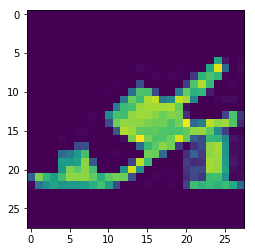

In [10]:
plt.imshow(image)
plt.show()

In [11]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)

In [12]:
print('x_train shape: {}'.format(x_train.shape))

x_train shape: (60000, 28, 28, 1)


In [14]:
input_shape = (im_rows, im_cols, 1)
model = Sequential()
model.add(Conv2D(1, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(1, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())

In [15]:
def nice_img_printer(model, img):
    '''returns the img as a 2d array'''
    exp_img = np.expand_dims(img,axis=0)
    conv_img = model.predict(exp_img)

    conv_img = np.squeeze(conv_img, axis=0)
    conv_img = np.reshape(conv_img, (-1, 12))
    return conv_img

(12, 12)


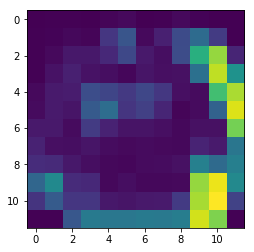

In [16]:
img = x_train[0]
img = nice_img_printer(model, img)

print(img.shape)
plt.imshow(img)

In [17]:
import time
initial_time = time.time()
for i in range(x_train.shape[0]):
    img = x_train[i]
    img = nice_img_printer(model, img)
reduction_time = time.time() - initial_time
print(reduction_time)

68.89946031570435


In [18]:
half_initial_time = time.time()
for i in range(x_train.shape[0] // 2):
    img = x_train[i]
    img = nice_img_printer(model, img)
half_reduction_time = time.time() - half_initial_time
print(half_reduction_time)

37.22411060333252


In [19]:
quarter_initial_time = time.time()
for i in range(x_train.shape[0] // 4):
    img = x_train[i]
    img = nice_img_printer(model, img)
quarter_reduction_time = time.time() - quarter_initial_time
print(quarter_reduction_time)

21.27598237991333


In [20]:
by6_initial_time = time.time()
for i in range(x_train.shape[0] // 6):
    img = x_train[i]
    img = nice_img_printer(model, img)
by6_reduction_time = time.time() - by6_initial_time
print(by6_reduction_time)

13.538273572921753


In [21]:
by8_initial_time = time.time()
for i in range(x_train.shape[0] // 8):
    img = x_train[i]
    img = nice_img_printer(model, img)
by8_reduction_time = time.time() - by8_initial_time
print(by8_reduction_time)

9.90831971168518


In [22]:
by16_initial_time = time.time()
for i in range(x_train.shape[0] // 16):
    img = x_train[i]
    img = nice_img_printer(model, img)
by16_reduction_time = time.time() - by16_initial_time
print(by16_reduction_time)

5.182500123977661


In [23]:
by32_initial_time = time.time()
for i in range(x_train.shape[0] // 32):
    img = x_train[i]
    img = nice_img_printer(model, img)
by32_reduction_time = time.time() - by32_initial_time
print(by32_reduction_time)

2.2532787322998047


In [24]:
by10_initial_time = time.time()
for i in range(x_train.shape[0] // 10):
    img = x_train[i]
    img = nice_img_printer(model, img)
by10_reduction_time = time.time() - by10_initial_time
print(by10_reduction_time)

7.363099575042725
